In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def func(series):
    m = 1.5
    b = 10
    #return np.array((m*series + b))
    return [np.random.randint(0,10) for x in series]

In [68]:
def centerX(x):
    l = len(x)
    x = np.linspace(start=-3, stop=+3, num=l)
    return np.reshape(x, [-1,1])

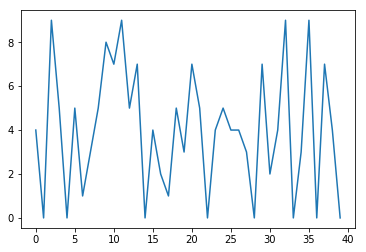

In [85]:
x = np.array([x for x in range(40)])
y = np.array(func(x))
x = np.reshape(x, [-1,1])
y = np.reshape(y, [-1,1])

plt.plot(x,y)

In [86]:
# Convert the dates to floats and center
x = centerX(x)
# Align the new x values with Y
data = np.concatenate((x,y), axis=1)

In [121]:
# Put into clusters
segmentLength = int(len(x)/3)
idx1 = y[:segmentLength]
idx2 = y[segmentLength:-segmentLength]
idx3 = y[-segmentLength:]
c1 = np.array([idx1.mean(), x[:segmentLength].mean()])
c2 = np.array([idx2.mean(), x[segmentLength:-segmentLength].mean()])
c3 = np.array([idx3.mean(), x[-segmentLength:].mean()])
centers = np.concatenate((c1,c2,c3))
centers = np.reshape(centers, [3,2])

In [123]:
km = KMeans(n_clusters=3, init=centers).fit(data)

/home/tbrownex/tensorflow/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [124]:
# Get the members of each cluster
d = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
d

{0: array([ 2,  9, 10, 11, 13, 20, 29, 32, 35, 37]),
 1: array([ 1,  4,  6, 14, 16, 17, 22, 28, 30, 33, 36, 39]),
 2: array([ 0,  3,  5,  7,  8, 12, 15, 18, 19, 21, 23, 24, 25, 26, 27, 31, 34,
        38])}

In [89]:
groups = []
for n in range(km.n_clusters):
    groups.append(data[d[n]])

In [91]:
km.cluster_centers_

array([[-0.12820513,  4.16666667],
       [ 0.04615385,  7.9       ],
       [ 0.15384615,  0.5       ]])

In [ ]:
newlist = sorted(g, key=lambda x: x.count, reverse=True)

In [49]:
for g in groups:
    print(g)
    input()

[[-3.         10.        ]
 [-2.84615385 11.5       ]
 [-2.69230769 13.        ]
 [-2.53846154 14.5       ]
 [-2.38461538 16.        ]
 [-2.23076923 17.5       ]
 [-2.07692308 19.        ]
 [-1.92307692 20.5       ]
 [-1.76923077 22.        ]
 [-1.61538462 23.5       ]
 [-1.46153846 25.        ]
 [-1.30769231 26.5       ]
 [-1.15384615 28.        ]]

[[ 1.15384615 50.5       ]
 [ 1.30769231 52.        ]
 [ 1.46153846 53.5       ]
 [ 1.61538462 55.        ]
 [ 1.76923077 56.5       ]
 [ 1.92307692 58.        ]
 [ 2.07692308 59.5       ]
 [ 2.23076923 61.        ]
 [ 2.38461538 62.5       ]
 [ 2.53846154 64.        ]
 [ 2.69230769 65.5       ]
 [ 2.84615385 67.        ]
 [ 3.         68.5       ]]

[[-1.         29.5       ]
 [-0.84615385 31.        ]
 [-0.69230769 32.5       ]
 [-0.53846154 34.        ]
 [-0.38461538 35.5       ]
 [-0.23076923 37.        ]
 [-0.07692308 38.5       ]
 [ 0.07692308 40.        ]
 [ 0.23076923 41.5       ]
 [ 0.38461538 43.        ]
 [ 0.53846154 44.5      

In [116]:
def getStats(g):
    return (g.mean(), g.std())

In [117]:
mu, std = getStats(g1)

In [75]:
earliest = km.cluster_centers_[earliest]
latest = km.cluster_centers_[latest]
mid = km.cluster_centers_[mid]

In [59]:
first = km.cluster_centers_[earliest]

array([[ 2.0000000e+00,  5.8750000e+01],
       [-2.0000000e+00,  1.9750000e+01],
       [ 1.6283271e-16,  3.9250000e+01]])